In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
np.random.seed(1)
budget = np.random.randint(50, 200, 50)
box_office = budget * np.random.uniform(1.5, 2.5, 50)
rating = 0.03 * budget + 0.01 * box_office + np.random.normal(0, 1, 50)

df = pd.DataFrame({
    'Budget': budget,
    'BoxOffice': box_office,
    'Rating': rating
})

In [ ]:
#Simple Linear Regression
X_simple = df[['Budget']]
y = df['Rating']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=1)
model_simple = LinearRegression()
model_simple.fit(X_train_s,y_train_s)
y_predict_s=model_simple.predict(X_test_s)

#Mutliple Linear Regression
X_multi = df[['Budget', 'BoxOffice']]
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=1)
model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)
y_pred_m = model_multi.predict(X_test_m)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


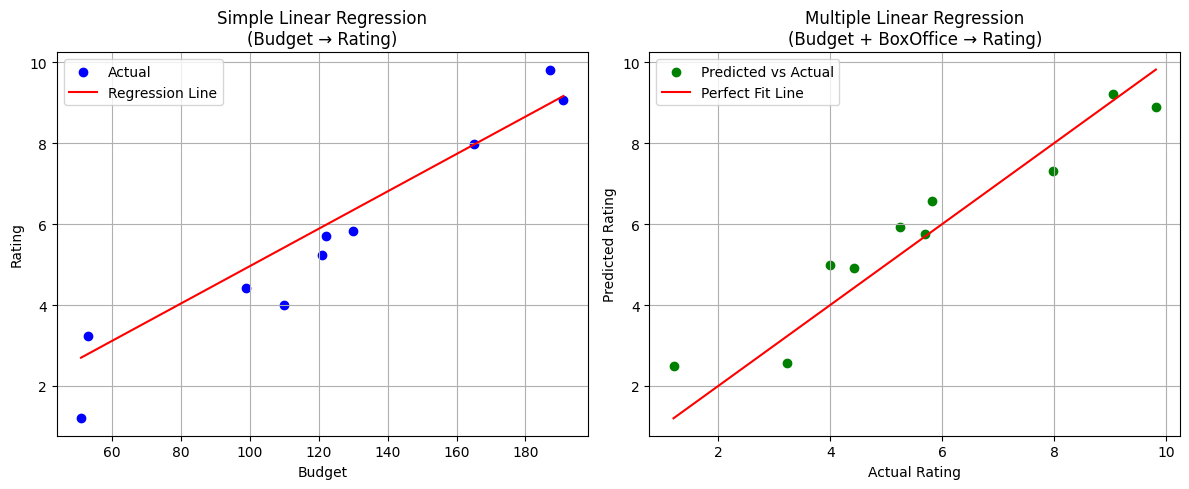

In [ ]:
# Step 4: Plotting Both with Regression Lines
plt.figure(figsize=(12, 5))

# Plot for Simple Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual')
x_line = np.linspace(X_test_s.min(), X_test_s.max(), 100).reshape(-1, 1)
y_line = model_simple.predict(x_line)
plt.plot(x_line, y_line, color='red', label='Regression Line')
plt.xlabel("Budget")
plt.ylabel("Rating")
plt.title("Simple Linear Regression\n(Budget → Rating)")
plt.legend()
plt.grid(True)

# Plot for Multiple Linear Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test_m, y_pred_m, color='green', label='Predicted vs Actual')
plt.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], color='red', label='Perfect Fit Line')
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Multiple Linear Regression\n(Budget + BoxOffice → Rating)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()